# imports

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 15 ("                               'fc4f30', ")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 16 ("                               'e5ae38',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 17 ("                               '6d904f',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 18 ("                               '8b8b8b',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 19 ("                               '810f7c'])")
Bad value in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 14 ("axes.prop_cycle: cycler(color=['008fd5', "): Key axes.prop_cycle: 'cycler(color=['008fd5',' is not a valid cycler construction: unexpected EOF while parsing (<unknown>, 

In [6]:
# Draw beautiful graphics to avoid blurred images
%config InlineBackend.figure_format = 'retina'

# seaborn
- Seaborn is a Python data visualization library based on matplotlib.

# Linechart
- Name of a seaborn **palette** (deep, muted, bright, pastel, dark, colorblind)
- **set_theme()** - uses the matplotlib rcParam system and will affect how all matplotlib plots look
- **context**: affects the size of the labels, lines, and other elements but not the overall style
- available contexts: *paper, notebook, talk, poster*
- **style** parameters control properties like the color of the background and whether a grid is enabled
- styles: *darkgrid, whitegrid, dark, white, ticks*

In [6]:
gapminder = pd.read_csv('data/gapminder.csv')
italy = gapminder[gapminder.country=='Italy']

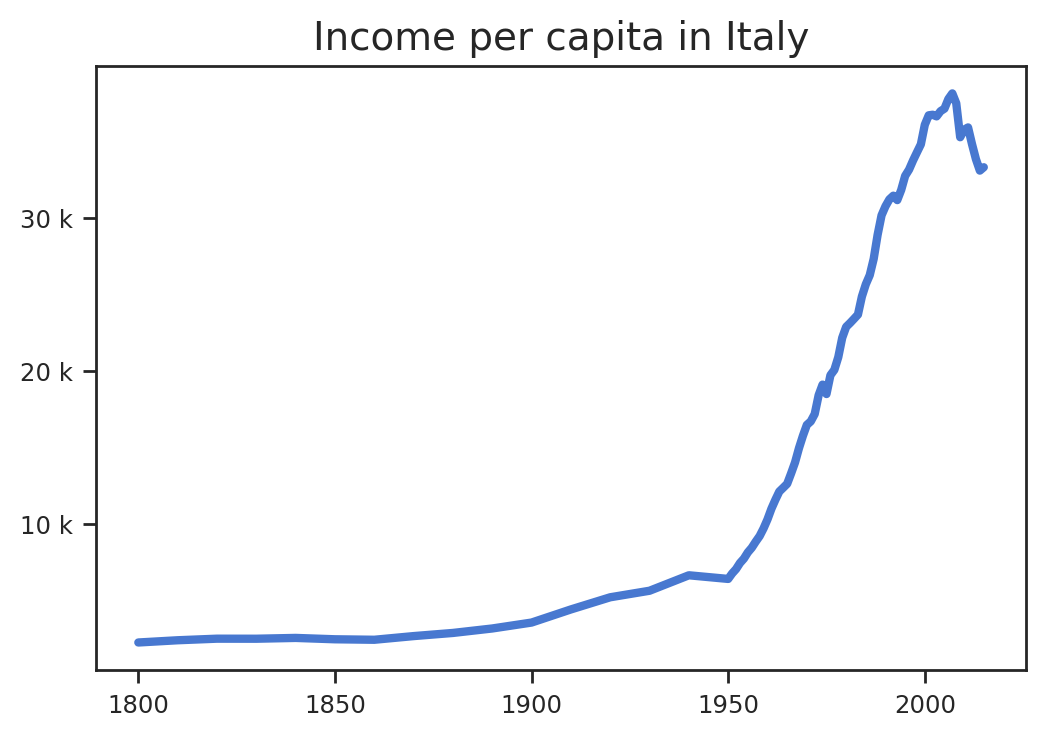

In [7]:
sns.set_theme(context='paper', style="ticks", palette="muted")
# Axes to apply matplot adjustments within the ax
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

sns.lineplot(x=italy.year, y=italy.gdp_per_capita, linewidth=3)

# title but get rid of other labels since the are selfexplainig
ax.set_title('Income per capita in Italy', fontsize=14);
ax.set_ylabel('')
ax.set_xlabel('')

# fix the y labels
y = [10000,20000,30000]
labels=['10 k', '20 k', '30 k']
plt.yticks(y, labels)

plt.show()

# data preparation

### display.max_columns

In [ ]:
pd.set_option('display.max_columns', None)
whr_who[:40]

In [42]:
whr = pd.read_csv('data/WHR_2019.csv')
who = pd.read_csv('data/WHO.csv')

# rename 'United States of America' for better merging
# iat allows to access a single value for a row/column pair
who.iat[ 192, 0] = 'United States'

# merge
whr_who = whr.merge(who,
                    left_on="Country or region",
                    right_on="Country",
                    how='outer')

# get only columns of interest, sort decending by emisssions, letting out rows missing emissions
emissions = whr_who[[
    'Country', 'Continent', 'Score', 'Total_CO2_emissions', 'GDP per capita',
    'Population (in thousands) total', 'Perceptions of corruption',
    'Healthy life expectancy (HALE) at birth (years) both sexes'
]].sort_values('Total_CO2_emissions',
               ascending=False).dropna(subset='Total_CO2_emissions')

# simplify column names
emissions.columns = [
    'Country', 'Continent_no', 'happiness_score', 'emissions', 'gdp_pc',
    'population', 'percepted_corruption', 'HALE'
]

# drop rows with NA anywhere
emissions.dropna(inplace=True)

# dict for mapping
Continents = {
    1: "Eastern Mediterranean",
    2: "Europe",
    3: "Africa",
    4: "Americas",
    5: "South America",
    6: "South-East Asia",
    7: "South & Eastern Asia"
}

# inserts the new column at position 2 in the df
emissions.insert(2, 'Continent', emissions.Continent_no.map(Continents))
emissions['emissions_pc'] = emissions.emissions / (emissions.population * 1000)

# rearrange columns
new_cols = [
    'Country', 'Continent_no', 'Continent', 'happiness_score', 'gdp_pc',
    'emissions', 'emissions_pc', 'population', 'percepted_corruption', 'HALE'
]

emissions = emissions[new_cols]
emissions.to_csv('emissions_and_happiness.csv')
emissions

,Country,Continent_no,Continent,happiness_score,gdp_pc,emissions,emissions_pc,population,percepted_corruption,HALE
18,United States,4.0,Americas,6.892,1.433,5776431.50,0.019074,302841.0,0.128,69.0
92,China,7.0,South & Eastern Asia,5.191,1.029,5547757.50,0.004176,1328474.0,0.100,64.0
67,Russia,2.0,Europe,5.648,1.183,1503302.50,0.010496,143221.0,0.031,58.0
139,India,7.0,South & Eastern Asia,4.015,0.755,1402359.40,0.001218,1151751.0,0.085,53.0
57,Japan,6.0,South-East Asia,5.886,1.327,1230026.80,0.009613,127953.0,0.140,75.0
...,...,...,...,...,...,...,...,...,...,...
119,Gambia,3.0,Africa,4.516,0.308,285.79,0.000172,1663.0,0.167,50.0
154,Central African Republic,3.0,Africa,3.083,0.026,252.82,0.000059,4265.0,0.035,37.0
144,Burundi,3.0,Africa,3.775,0.046,223.50,0.000027,8173.0,0.180,35.0
131,Chad,3.0,Africa,4.350,0.350,139.23,0.000013,10468.0,0.078,41.0


In [55]:
emissions.sort_values('happiness_score', ascending=True)[:4]

,Country,Continent_no,Continent,happiness_score,gdp_pc,emissions,emissions_pc,population,percepted_corruption,HALE
154,Central African Republic,3.0,Africa,3.083,0.026,252.82,0.000059,4265.0,0.035,37.0
153,Afghanistan,1.0,Eastern Mediterranean,3.203,0.350,692.50,0.000027,26088.0,0.025,36.0
152,Tanzania,3.0,Africa,3.231,0.476,4671.60,0.000118,39459.0,0.147,40.0
151,Rwanda,3.0,Africa,3.334,0.359,604.56,0.000064,9464.0,0.411,38.0


# replot
- relations plot can switch betwen kind = 'scatter' and 'line' and has a few parameters to encode <br>
features namely:* size, hue, style*.
- source/df is given to the function with data=df and than the features can be called by name
- set_theme can change many aspects of the appearance, context, style, etc can be called seperatly
- height and aspect (the ratio of the width to the height) are used to change the figure size


## scatter

### simple scatter plot

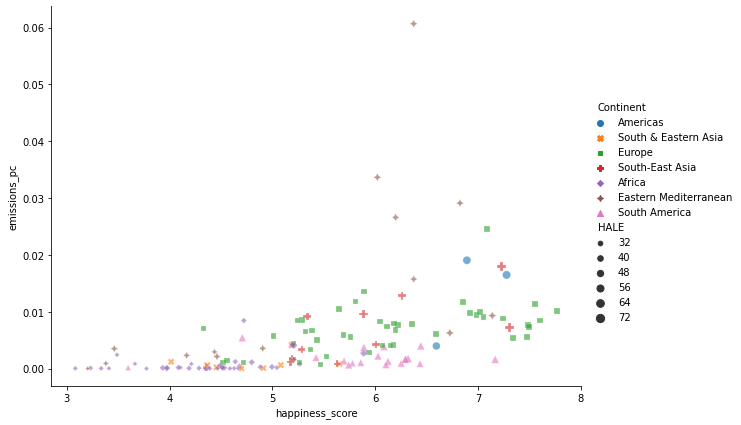

In [11]:
plot = sns.relplot(
    data=emissions,
    kind='scatter',
    x="happiness_score",
    y="emissions_pc",
    style='Continent',
    hue='Continent',
    size='HALE',
    alpha=0.6,  # transparency
    height=6,
    aspect=1.4)

### fancy scatter plot

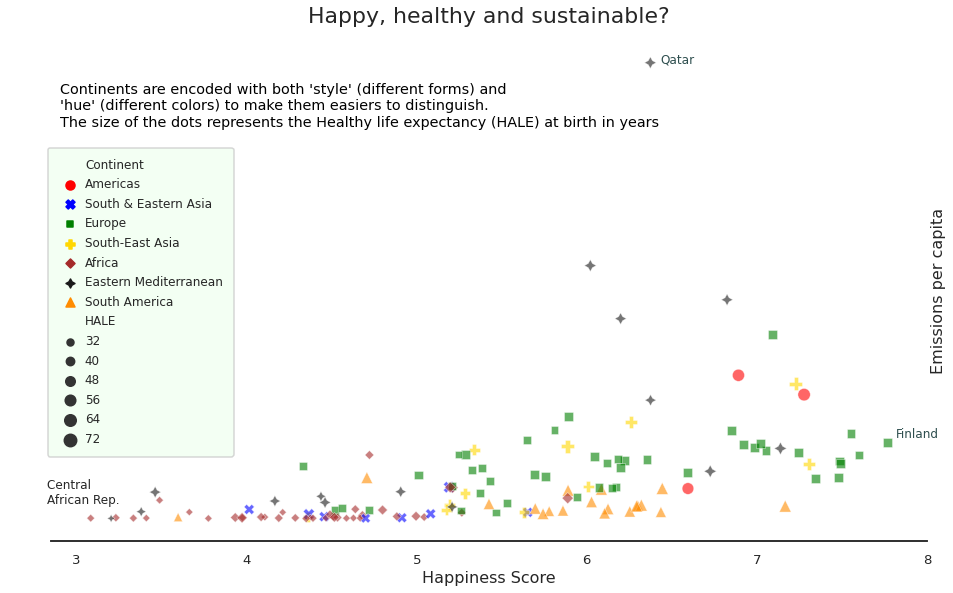

In [70]:
sns.set_theme(context='talk', style='white', font='sans-serif', font_scale=0.8)

# color mapping dict
hue_colors = {
    'Eastern Mediterranean': 'k',
    'Europe': 'green',
    'Africa': 'brown',
    'Americas': 'red',
    'South America': 'darkorange',
    'South-East Asia': 'gold',
    'South & Eastern Asia': 'blue',
}

plot = sns.relplot(
    data=emissions,
    kind='scatter',
    x="happiness_score",
    y="emissions_pc",
    style='Continent',
    hue='Continent',
    size='HALE',
    alpha=0.6,  # transparency
    height=8,
    aspect=1.7,
    palette=hue_colors)

sns.move_legend(plot,
    loc=(0.05, 0.23),
    fontsize=12,
    frameon=True,
    facecolor='honeydew',
    labelspacing=0.55,
    handletextpad=0.2,
    borderpad=0.9)

# Texts are aligned relative to their anchor point depending on the properties
# horizontalalignment and verticalalignment
plt.text(
    x=2.9,
    y=0.058,
    s="Continents are encoded with both 'style' (different forms) and \n'hue' (different colors) to make \
them easiers to distinguish. \nThe size of the dots represents the Healthy life expectancy (HALE) at birth in years"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ,
    ha='left',
    va='top',
    size='medium',
    color='black',
    fontweight=12)

ax= plt.gca()
ax.spines[["left", "top", "right"]].set_visible(False)  # hide spines

ax.set_xlabel('Happiness Score', fontsize=16)

ax.set(yticklabels=[]) # hide y ticks
ax.set_ylabel('Emissions per capita', fontsize=16)
ax.yaxis.set_label_position("right") # y label to the right
plt.title("Happy, healthy and sustainable?", fontsize=22, pad=17)

ax.annotate('Qatar', xy=(0.56, 0.92), xycoords='figure fraction', color='darkslategray', fontsize=12)
ax.annotate('Finland', xy=(0.76, 0.27), xycoords='figure fraction', color='darkslategray', fontsize=12)
ax.annotate('Central \nAfrican Rep.', xy=(0.04, 0.155), xycoords='figure fraction', color='darkslategray', fontsize=12)

plt.show()

## line graph

In [3]:
gapminder = pd.read_csv('data/gapminder.csv')
gjs = gapminder[gapminder.country.isin(['Germany', 'Japan', 'Sweden'])]
twenthies_century = gjs[gjs.year>=1900]
twenthies_century

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
4939,Germany,1800,Europe,22886919.0,38.37,65.975,5.40,1639.0,4.487337
4940,Germany,1810,Europe,23882461.0,38.37,65.975,5.35,1759.0,4.815880
4941,Germany,1820,Europe,25507768.0,38.37,65.975,5.37,1887.0,5.166324
4942,Germany,1830,Europe,28016571.0,38.37,61.144,4.78,2024.0,5.541410
4943,Germany,1840,Europe,31016143.0,38.37,51.443,4.90,2102.0,5.754962
...,...,...,...,...,...,...,...,...,...
12710,Sweden,2011,Europe,9462352.0,81.70,99.700,1.90,43709.0,119.668720
12711,Sweden,2012,Europe,9543457.0,81.80,99.700,1.91,43263.0,118.447639
12712,Sweden,2013,Europe,9624247.0,81.90,99.700,1.93,43448.0,118.954141
12713,Sweden,2014,Europe,9703247.0,82.10,99.700,1.93,44029.0,120.544832


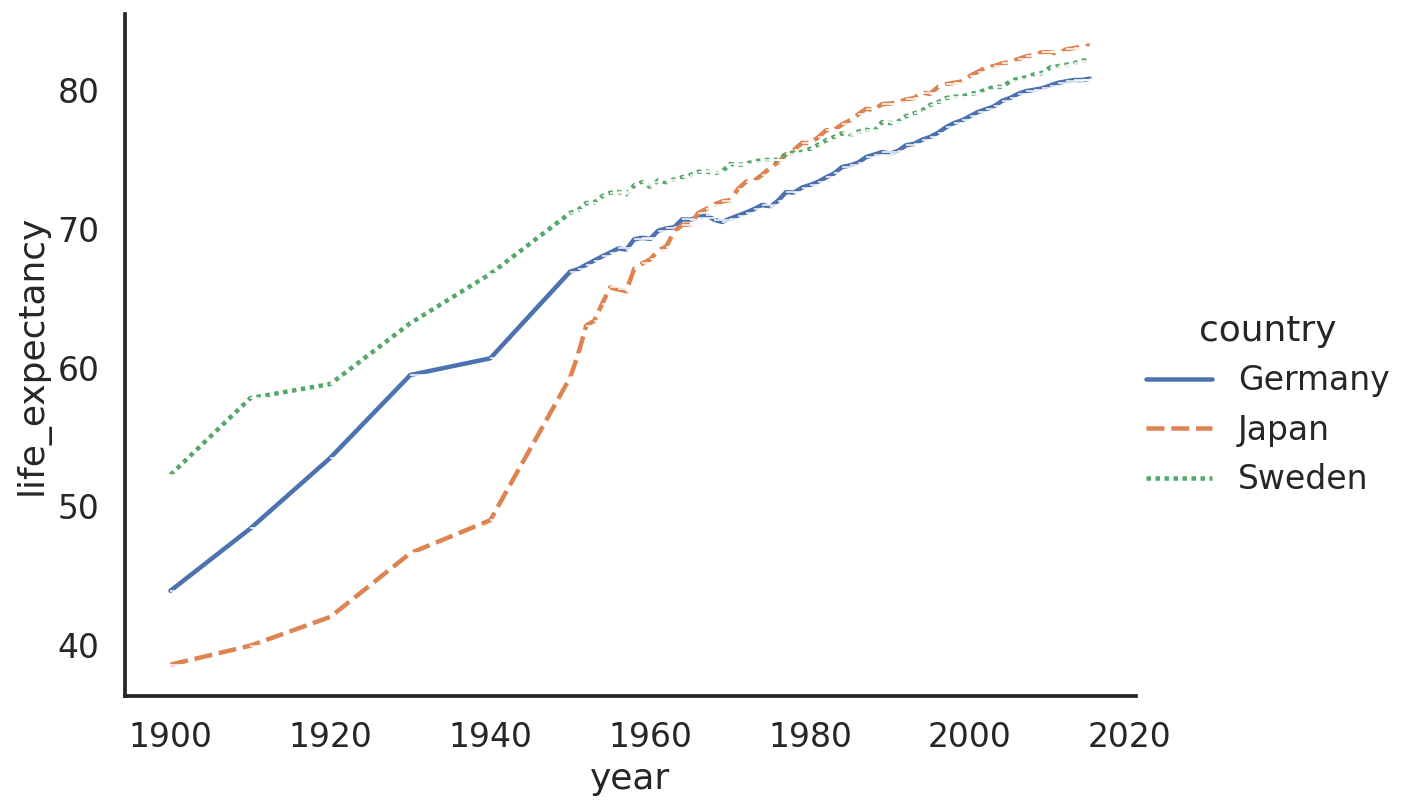

In [23]:
sns.set_theme(context='talk', style='white', font='sans-serif', font_scale=1)

sns.relplot(data=twenthies_century,
            x='year',
            y='life_expectancy',
            kind='line',
            hue='country', # differ countries by color
            style='country', # and line style
            marker=True,
            height=6,
            aspect=1.4
            )


### Confidence Interval 
- solid line is the mean of the combined life expectancy since we did not seperated by country
- the gray area is the 95% confidence interval, 95% of the observations are in this area

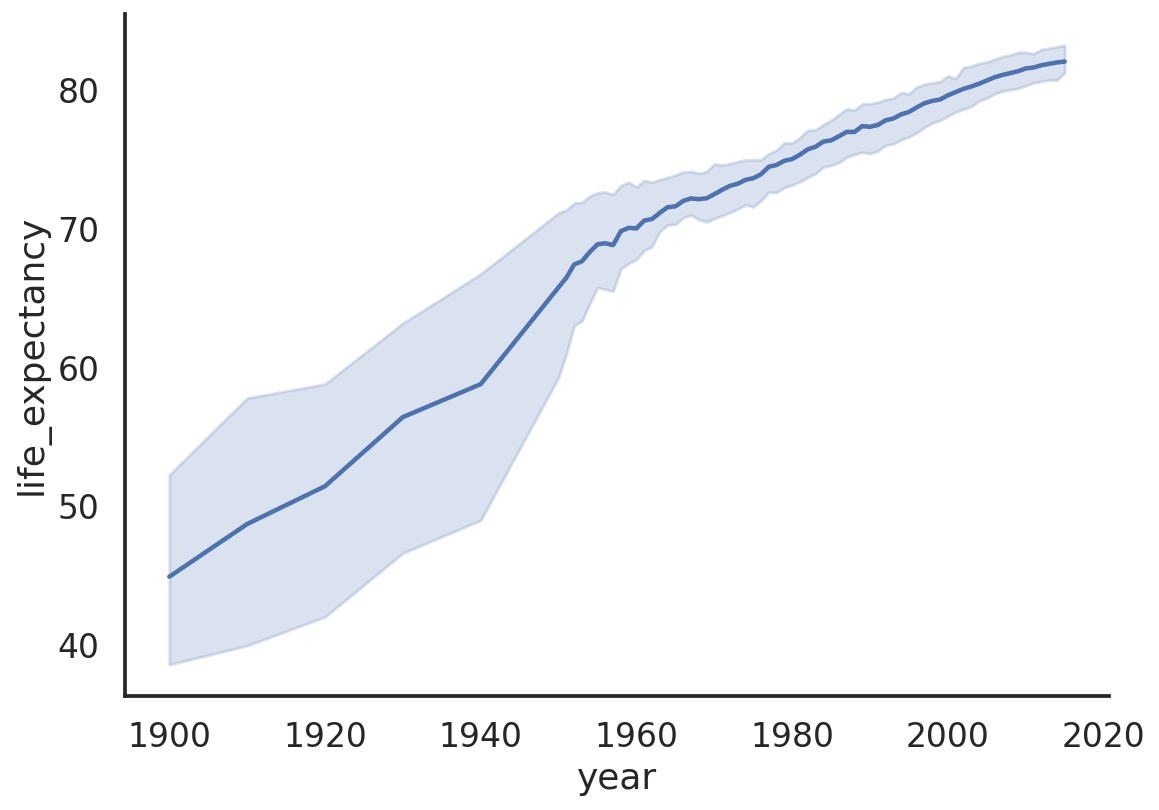

In [33]:
sns.set_theme(context='talk', style='white', font='sans-serif', font_scale=1)

g1 = sns.relplot(
    data=twenthies_century,
    x='year',
    y='life_expectancy',
    kind='line',
    # ci='sd', # standard deviation can be choosen instead of ci
    height=6,
    aspect=1.4)

## Subgraphs
- relplot is a graph-level function, it generates a FacetGrid a Multi-plot grid for plotting conditional relationships.
- add the parameter, **col**, to indicate that you want to create subgraphs in columns
- variables passed to col should be **discrete** in order to work
- **col_wrap**: tells seaborn how many columns we want in a row.
- **col_order**: specify the order of the categories in the column

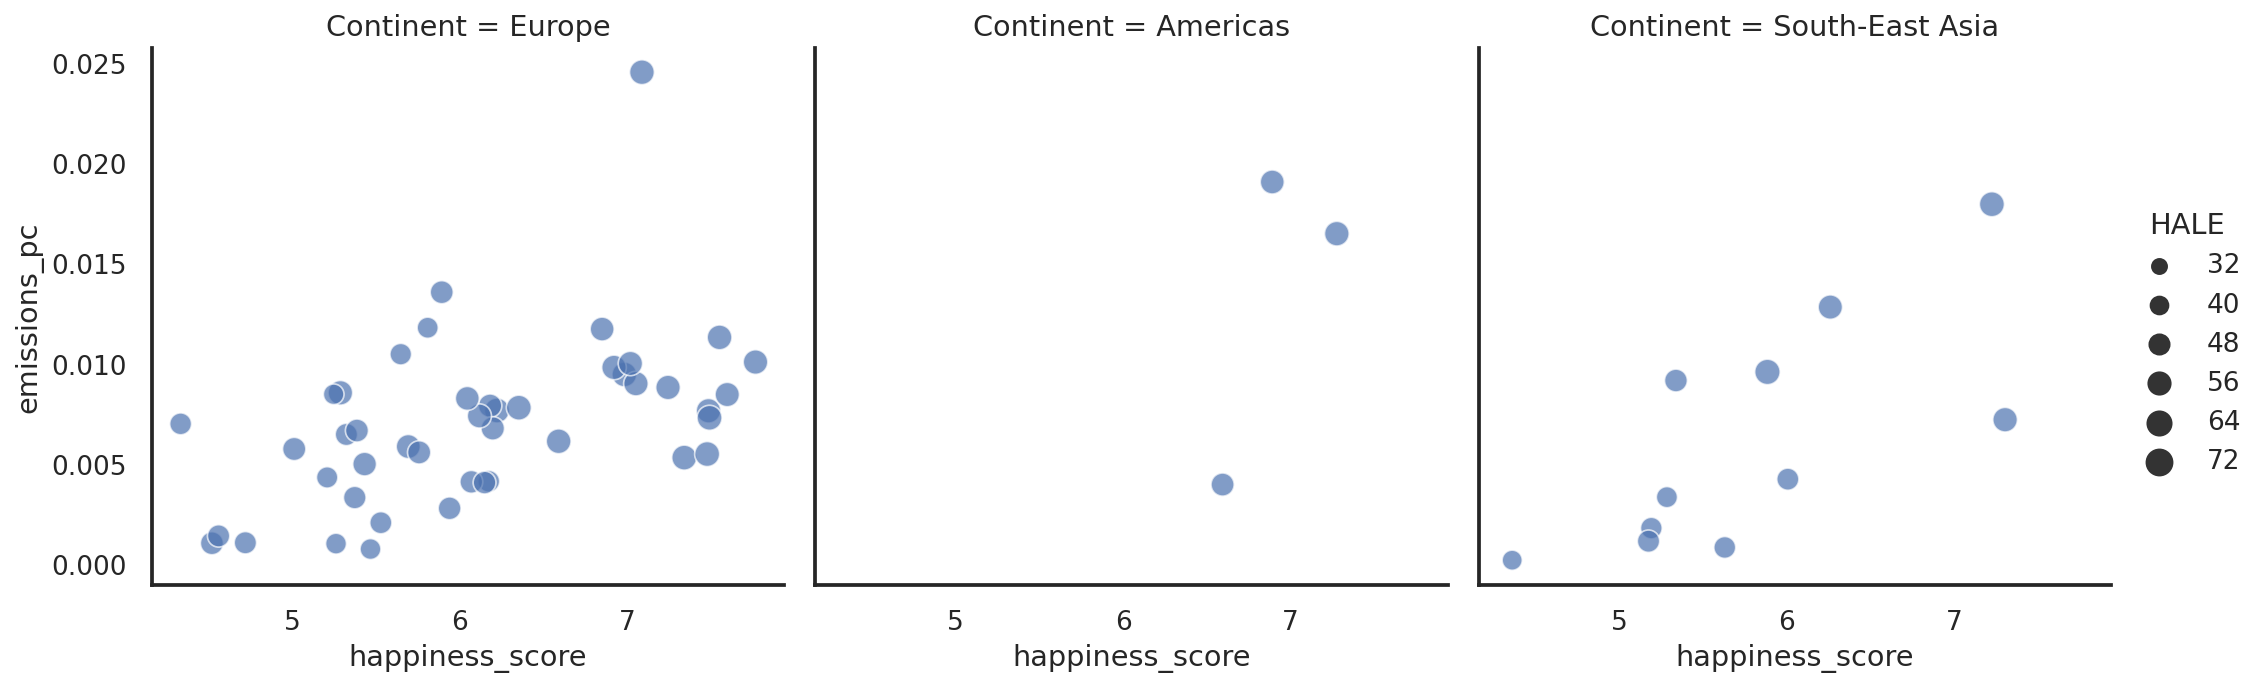

In [53]:
sns.relplot(
        data=emissions,
        kind='scatter',
        x="happiness_score",
        y="emissions_pc",
        size='HALE',
        palette='crest',
        alpha=0.7,
        col='Continent',
        col_order=['Europe', 'Americas', 'South-East Asia'],
        col_wrap=3)

In [22]:
gapminder = pd.read_csv('data/gapminder.csv')

In [24]:
pd.set_option('display.max_columns', None)
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


In [ ]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

['10 k', '20 k', '30 k']

In [ ]:
p = sns.color_palette("Spectral", as_cmap=True)  # built-in diverging palette
sns.relplot(data=emissions,
            kind='scatter',
            x="happiness_score",
            y="emissions_pc",
            style='Continent_name',
            hue='Continent_name',
            size='HALE',
            height=8,
            aspect=1.3,
            palette=hue_colors)
plt.title("Happy, healthy and sustainable?", fontsize=22, pad=20)
plt.show()

In [ ]:
x = gapminder[gapminder.year == 1965]['babies_per_woman']
y = gapminder[gapminder.year == 1965]['age5_surviving']

In [ ]:
sns.relplot(x=x, y=y, color='teal', size=10, legend=False, kind='line', height=6, aspect=1.5);

NameError: name 'sns' is not defined

# palette
- **palette**: Set the matplotlib color cycle using a seaborn palette
- palettes: *deep, muted, bright, pastel, dark, colorblind* or 
  - name of matplotlib colormap or 
  - husl’ or ‘hls’ or -  evenly spaced hues in the “HUSL” system: sns.hls_palette(10, s=.4)
  - ‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,
  - uniform colormaps in seaborn: sns.color_palette("flare", as_cmap=True)
  - customized cubehelix color palette: sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
  - Make a diverging palette between two HUSL colors: sns.diverging_palette(240, 10, n=9)
  - Make a palette with color names from Crayola crayons: seaborn.crayon_palette(colors)

https://www.fatalerrors.org/a/master-a-third-of-seaborn-use-relplot-for-statistical-mapping.html